# Analisis e imputacion de series de tiempo

Se van a estudiar todas las series de tiempo que se tienen de pacifico y se realizara un analisis de los datos para determinar metodologia de imputacion, la cual se realizara posteriormente para obtener los productos finalizados que son las series compreltas.

1. Se importan las librerias necesarias para el proyecto

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from api_somo import fetch_and_process_data, unify_series
from graphics_utils.express import fig_boxplot
from statistics_utils.eda.timeseries import decompose_time_series, test_stationarity
from graphics_utils.go import multi_scatter

2. Se extraen las series de tiempo que se van a trabajar desde la base de datos creada para el manejo de los datos y estaciones atmosfericas de SOMO Dimar a travez de la API creada para gestionar los datos, y se grafican.

In [3]:
# PARAMETROS PARA OBTENER SERIE DE TIEMPO DESDE LA API SOMO

api_filtrate_seire = "http://127.0.0.1:8000/database/filter-serie-qf/"
V = "Precipitación acumulada"
P="Control de calidad"
tumaco_fetch = {"station_name": "tumaco","variable_name": V,"processing_level_name": P,}
malaga_fetch = {"station_name": "Bahía málaga","variable_name": V,"processing_level_name": P,}
solano_fetch = {"station_name": "Bahía solano","variable_name": V,"processing_level_name": P,}
gorgona_fetch = {"station_name": "Gorgona","variable_name": V,"processing_level_name": P,}
juanchaco_fetch = {"station_name": "Juanchaco","variable_name": V,"processing_level_name": P,}
malpelo_fetch = {"station_name": "Malpelo","variable_name": V,"processing_level_name": P,}

# Datos de entrada
stations = {
    "solano": solano_fetch,
    "malaga": malaga_fetch,
    "juanchaco": juanchaco_fetch,
    "malpelo": malpelo_fetch,
    "gorgona": gorgona_fetch,
    "tumaco": tumaco_fetch,
}

# Unificar todas las series en un DataFrame
data_stations = unify_series(api_filtrate_seire, stations)

# Muestra el DataFrame unificado
print(data_stations.shape)
print(data_stations)




"""serie = fetch_and_process_data(api_filtrate_seire, params)

print(serie.isnull().sum())

serie = categorize_precipitation(serie, params)"""

(731808, 6)
                           solano   malaga  juanchaco  malpelo  gorgona  \
timestamp                                                                 
2009-02-01 05:10:00+00:00     NaN      NaN        NaN      NaN      NaN   
2009-02-01 05:20:00+00:00     NaN      NaN        NaN      NaN      NaN   
2009-02-01 05:30:00+00:00     NaN      NaN        NaN      NaN      NaN   
2009-02-01 05:40:00+00:00     NaN      NaN        NaN      NaN      NaN   
2009-02-01 05:50:00+00:00     NaN      NaN        NaN      NaN      NaN   
...                           ...      ...        ...      ...      ...   
2023-01-01 04:20:00+00:00     0.0 -99999.0        0.0      NaN      NaN   
2023-01-01 04:30:00+00:00     0.0 -99999.0        0.0      NaN      NaN   
2023-01-01 04:40:00+00:00     0.0      0.0        0.0      NaN      NaN   
2023-01-01 04:50:00+00:00     0.1      0.0        0.0      NaN      NaN   
2023-01-01 05:00:00+00:00     0.0      0.0        0.0      NaN      NaN   

            

'serie = fetch_and_process_data(api_filtrate_seire, params)\n\nprint(serie.isnull().sum())\n\nserie = categorize_precipitation(serie, params)'

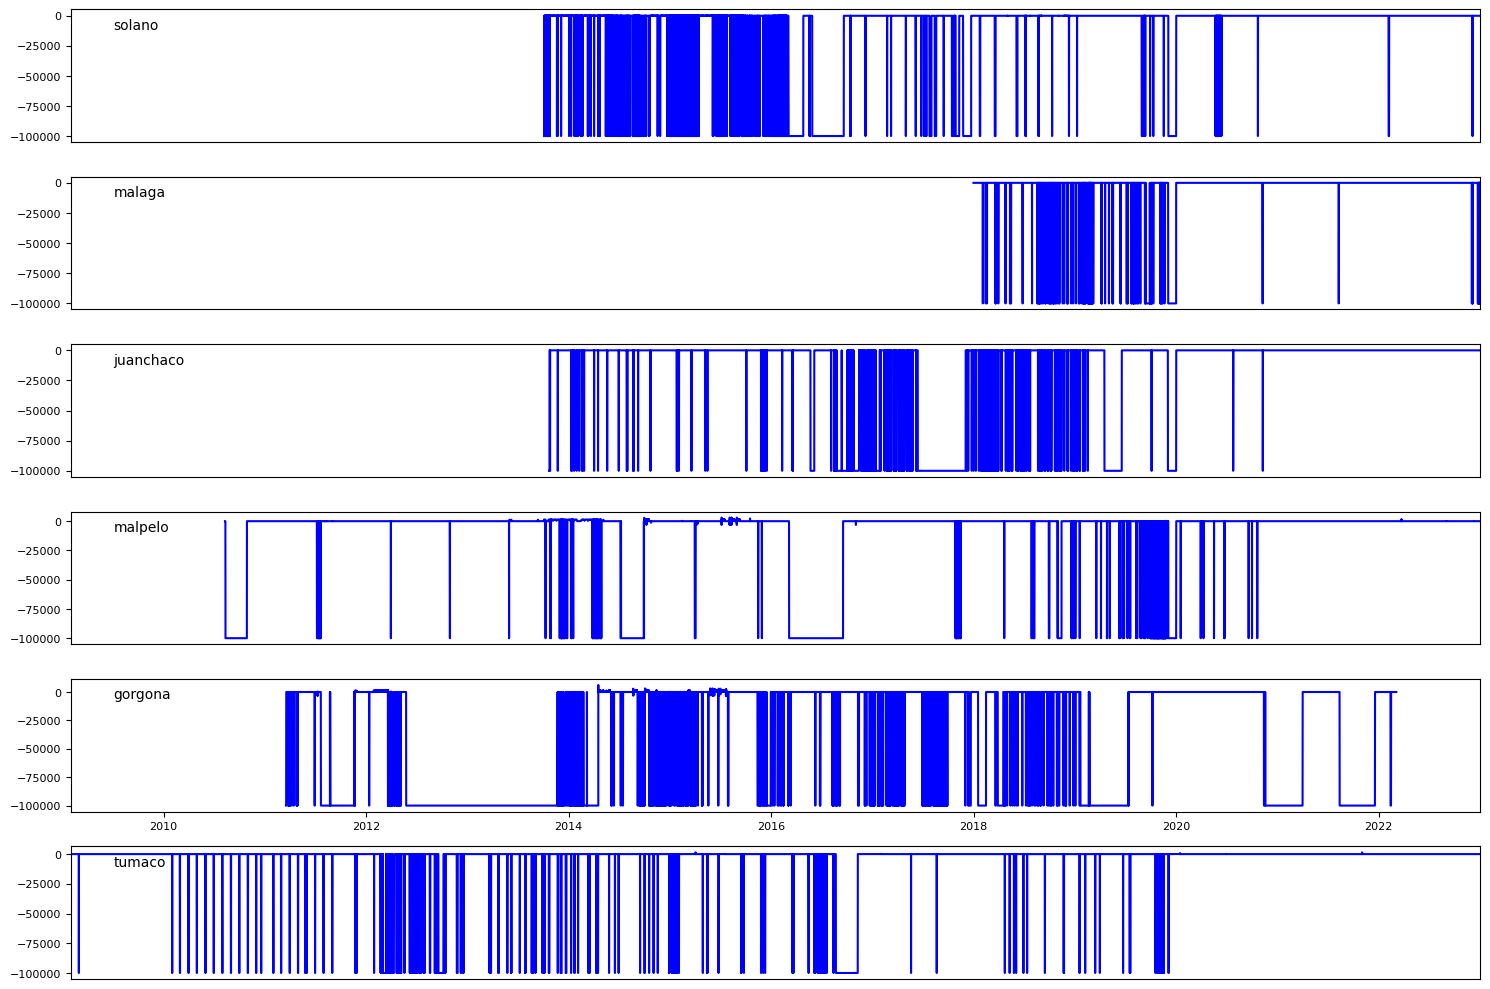

In [4]:
# Gráficar
fig, axs = plt.subplots(nrows=data_stations.shape[1], ncols=1, figsize=(15, 10)) # Ajustar el número de "nrows" por el número de columnas a gráficar
for i, col in enumerate(data_stations.columns[0:]):
    fila = i
    columna = 0
    ax = axs[fila]
    ax.plot(data_stations.index, data_stations[col], color='blue')
    ax.set_ylabel('', fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.set_xlim(data_stations.index.min(), data_stations.index.max())
    ax.text(0.03, 0.85, col, transform=ax.transAxes, fontsize=10)
    if i != len(data_stations.columns[1:]) - 1:
        ax.set_xticks([])
    else:
        ax.set_xlabel('', fontsize=6)
plt.subplots_adjust(hspace=0.05)
plt.tight_layout()
plt.show()

In [5]:
#Muestra cuantas celdas con datos nulos o faltantes tiene cada columna de la base de datos
data_stations.isnull().sum()

solano       245664
malaga       468720
juanchaco    248256
malpelo       80208
gorgona      155088
tumaco            1
dtype: int64

# Revisar correlacion entre estaciones

solano       0
malaga       0
juanchaco    0
malpelo      0
gorgona      0
tumaco       0
dtype: int64


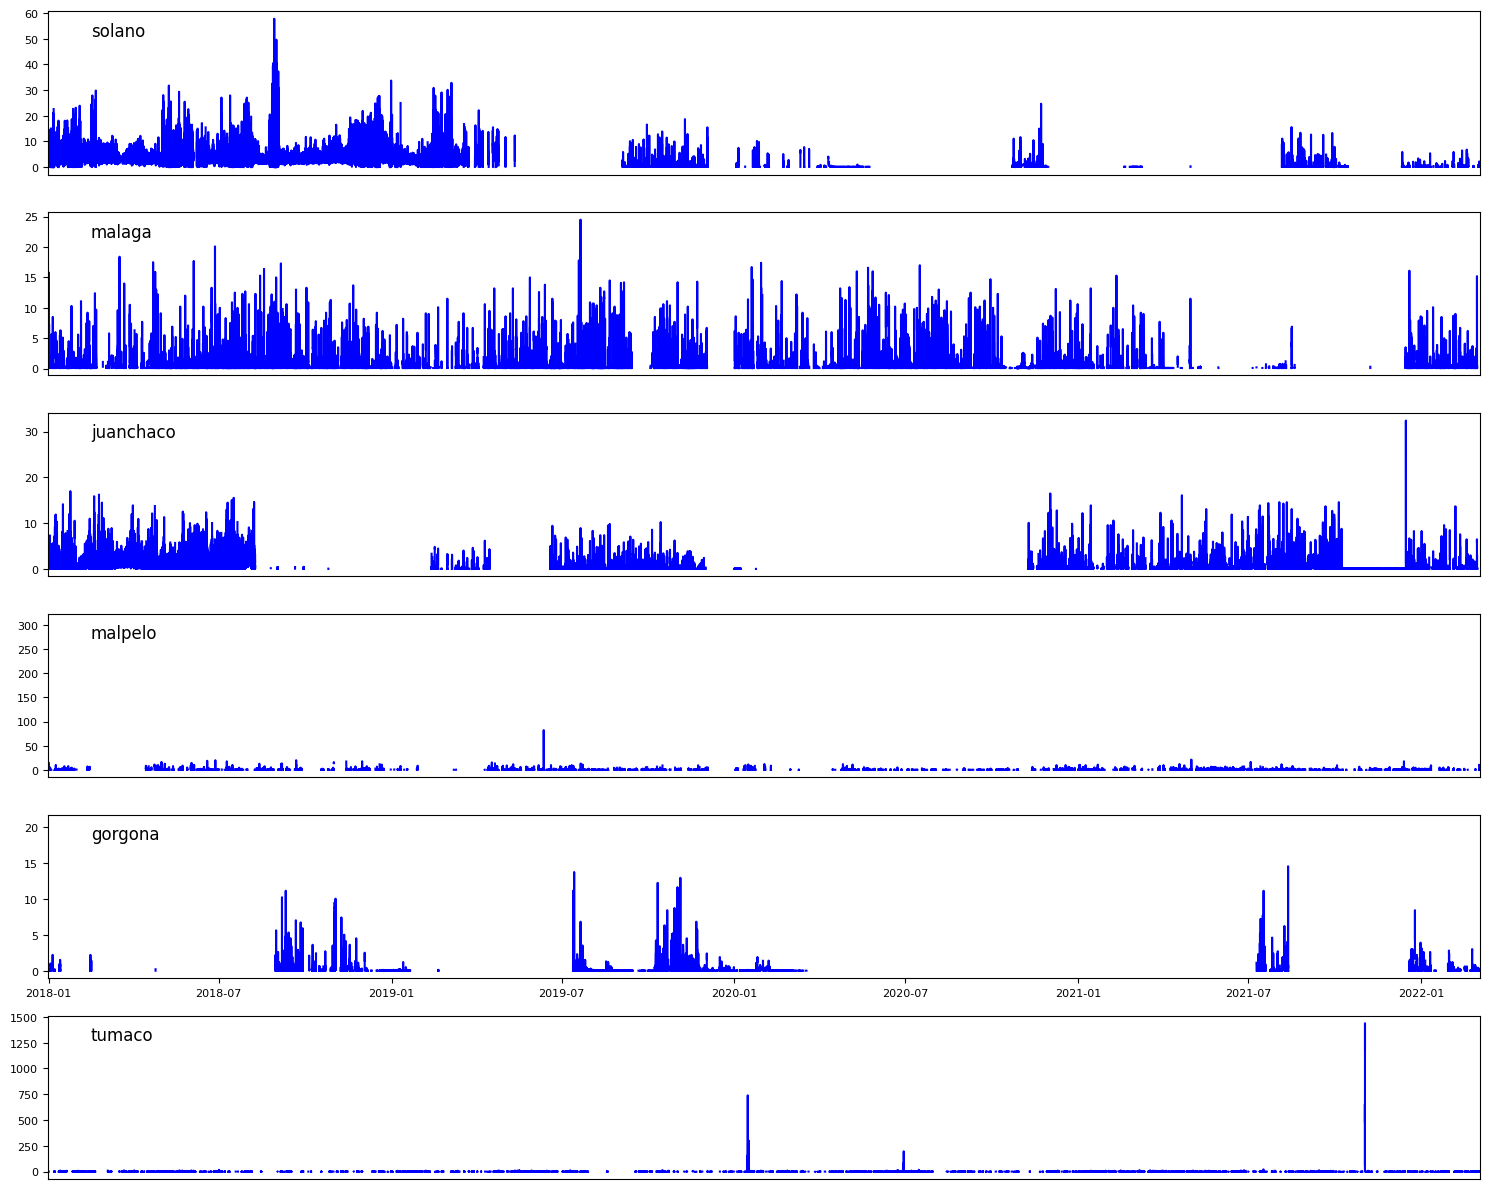

In [ ]:
# Crear un dataframe con solo las filas con datos en todas las columnas
estaciones_con_datos = data_stations.dropna()
estaciones_con_datos.shape
#Muestra cuantas celdas con datos nulos o faltantes tiene cada columna de la base de datos

print(estaciones_con_datos.isnull().sum())
# Filtrar solo los valores mayores que 0 en el DataFrame
estaciones_con_datos = estaciones_con_datos[estaciones_con_datos > 0].dropna(how='all')



# Gráficar
fig, axs = plt.subplots(nrows=estaciones_con_datos.shape[1], ncols=1, figsize=(15, 12)) # Ajustar el número de "nrows" por el número de columnas a gráficar
for i, col in enumerate(estaciones_con_datos.columns[0:]):
    fila = i
    columna = 0
    ax = axs[fila]
    ax.plot(estaciones_con_datos.index, estaciones_con_datos[col], color='blue')
    ax.set_ylabel('', fontsize=10)
    ax.tick_params(axis='both', which='major', labelsize=8)
    ax.set_xlim(estaciones_con_datos.index.min(), estaciones_con_datos.index.max())
    ax.text(0.03, 0.85, col, transform=ax.transAxes, fontsize=12)
    if i != len(estaciones_con_datos.columns[1:]) - 1:
        ax.set_xticks([])
    else:
        ax.set_xlabel('', fontsize=6)
plt.subplots_adjust(hspace=0.05)
plt.tight_layout()
plt.show()

,solano,malaga,juanchaco,malpelo,gorgona,tumaco
solano,1.000000,-0.000361,0.062341,0.009267,-0.039646,-0.027226
malaga,-0.000361,1.000000,0.215148,-0.042880,0.040130,0.012138
juanchaco,0.062341,0.215148,1.000000,0.041953,0.088536,-0.016562
malpelo,0.009267,-0.042880,0.041953,1.000000,0.004761,-0.042945
gorgona,-0.039646,0.040130,0.088536,0.004761,1.000000,-0.032980
tumaco,-0.027226,0.012138,-0.016562,-0.042945,-0.032980,1.000000


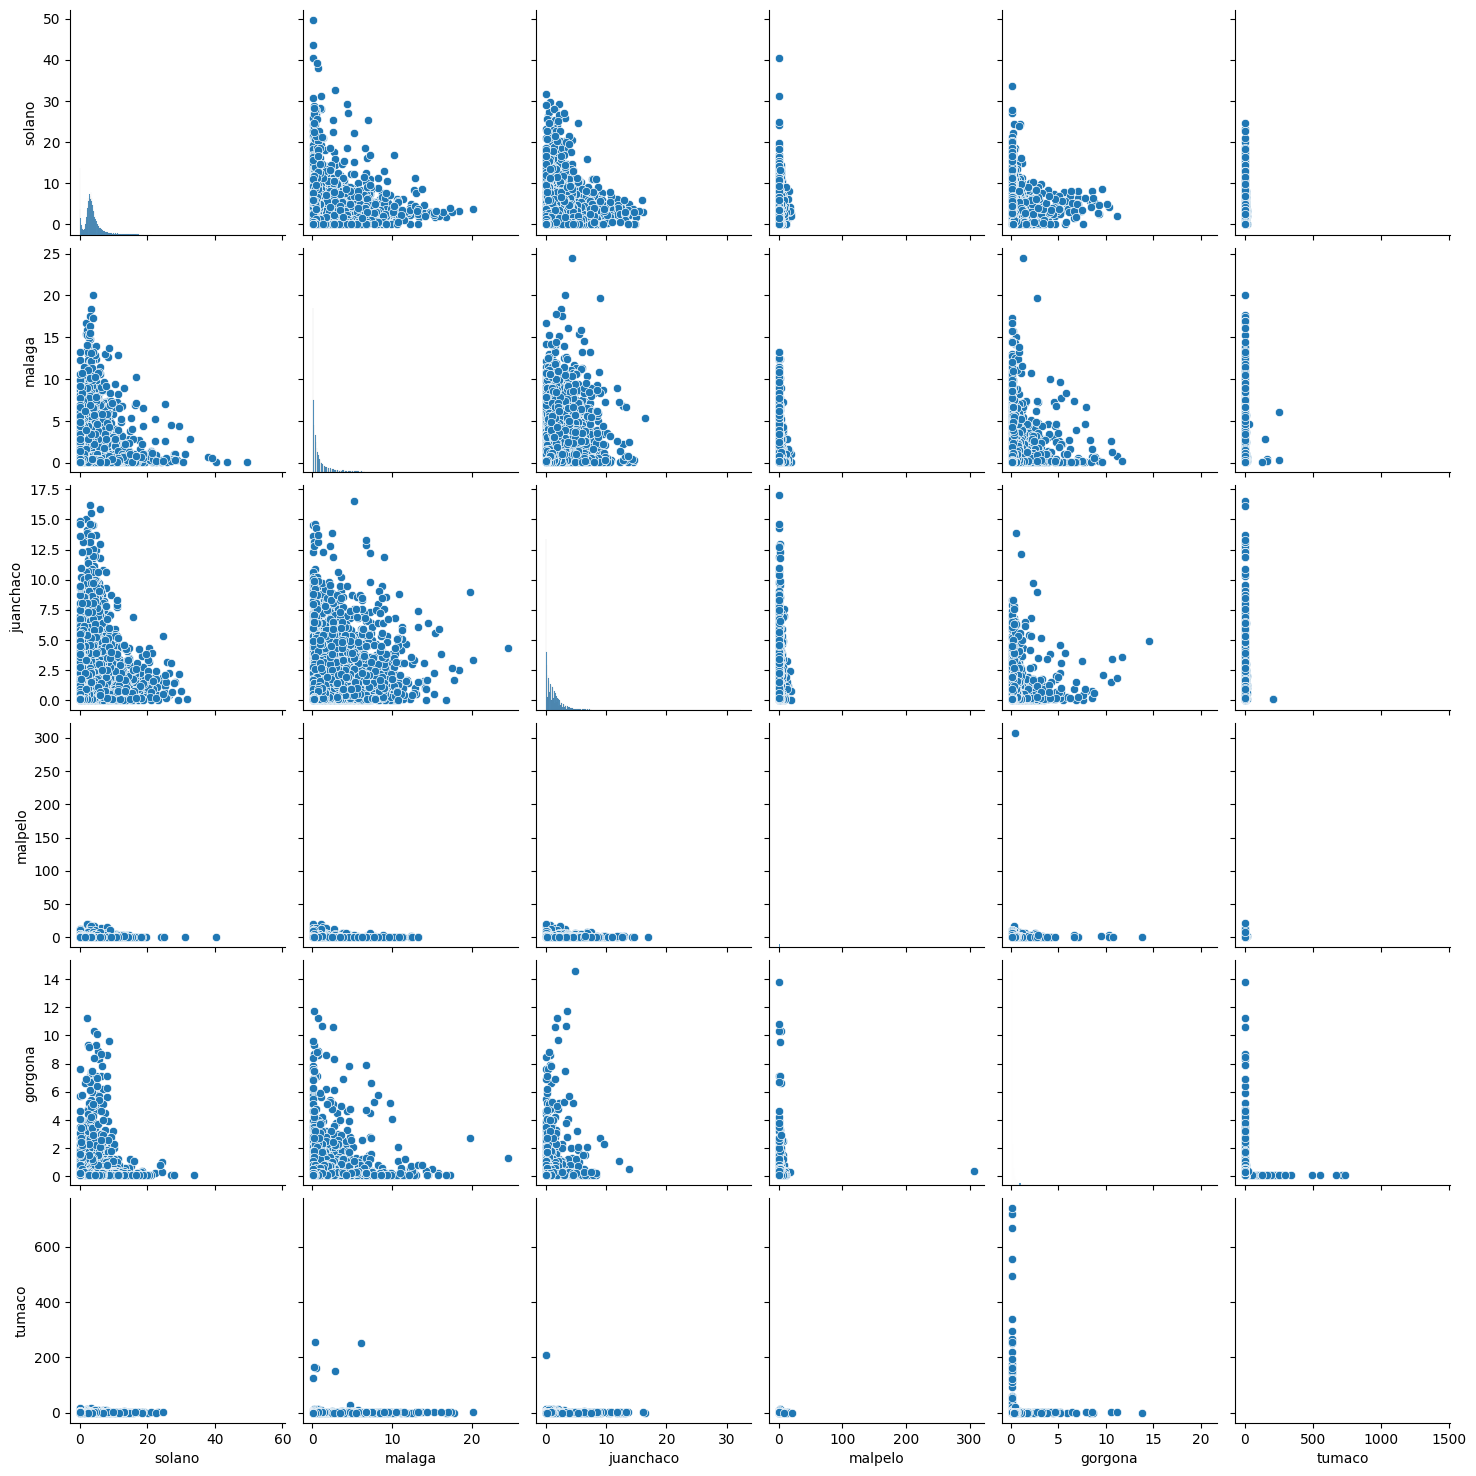

In [7]:
# Método gráfico de dispersión
sns.pairplot(estaciones_con_datos)
# Metodo numerico
estaciones_con_datos.corr()


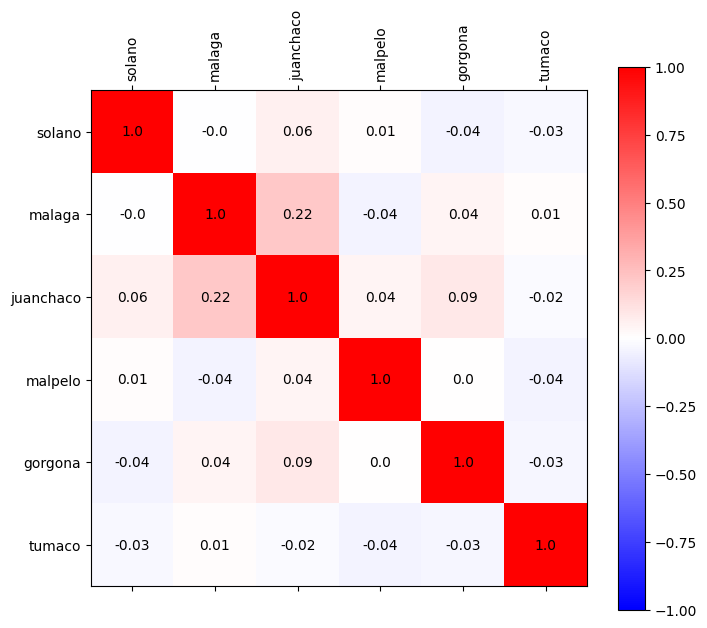

In [8]:
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
matriz = estaciones_con_datos.corr()

# Crear la figura de la matriz de correlación
plt.matshow(matriz, cmap="bwr", vmin=-1, vmax=1)

# Configurar etiquetas de los ejes X e Y
plt.xticks(range(len(matriz.columns)), estaciones_con_datos.columns, rotation=90)
plt.yticks(range(len(matriz.columns)), estaciones_con_datos.columns)

# Agregar los valores de la correlación en cada celda de la matriz
for i in range(len(matriz.columns)):
    for j in range(len(matriz.columns)):
        plt.text(i, j, round(matriz.iloc[i, j], 2), ha="center", va="center", color="black")

# Agregar barra de colores
plt.colorbar()

# Ajustar el tamaño de la figura
plt.gcf().set_size_inches(8, 7)

# Mostrar la matriz de correlación
plt.show()


# Imputacion de datos faltantes

In [9]:
#Muestra cuantas celdas con datos nulos o faltantes tiene cada columna de la base de datos
data_stations.isnull().sum()

solano       245664
malaga       468720
juanchaco    248256
malpelo       80208
gorgona      155088
tumaco            1
dtype: int64

## Elegir estaciones de trabajo para prediccion
en esta seccion vamos a trabajar con 3 estaciones dos predictoras y una a predecir, es decir 2 van a ser los datos de entrenamiento y la sobrante va a ser la estacion a la cual se le vana predecir los datos ausente.

In [10]:
#Organizamos un dataframe con tres estaciones (2 estaciones para ser predictoras y 1 para ser predecida)
data_stations2 = data_stations[["solano", "juanchaco", "malaga"]] #ajuste
data_stations2.head(2)
data_stations2.isnull().sum()
data_stations2.index.min()

Timestamp('2009-02-01 05:10:00+0000', tz='UTC')

In [11]:
#Solo se dejan las filas que tengan datos en las tres estaciones
fechas_con_datos = data_stations2.dropna() #ajuste
fechas_con_datos.head(2)
fechas_con_datos.index.min()

Timestamp('2017-12-31 05:10:00+0000', tz='UTC')

# Implementacion del modelo autoarima para la serie de precipitacion

Ecuación de la recta: y =  0.51 x +  -2203.05
Coeficiente de correlación:  0.4556589849699407
Coeficiente de determinación:  0.20762511058382016


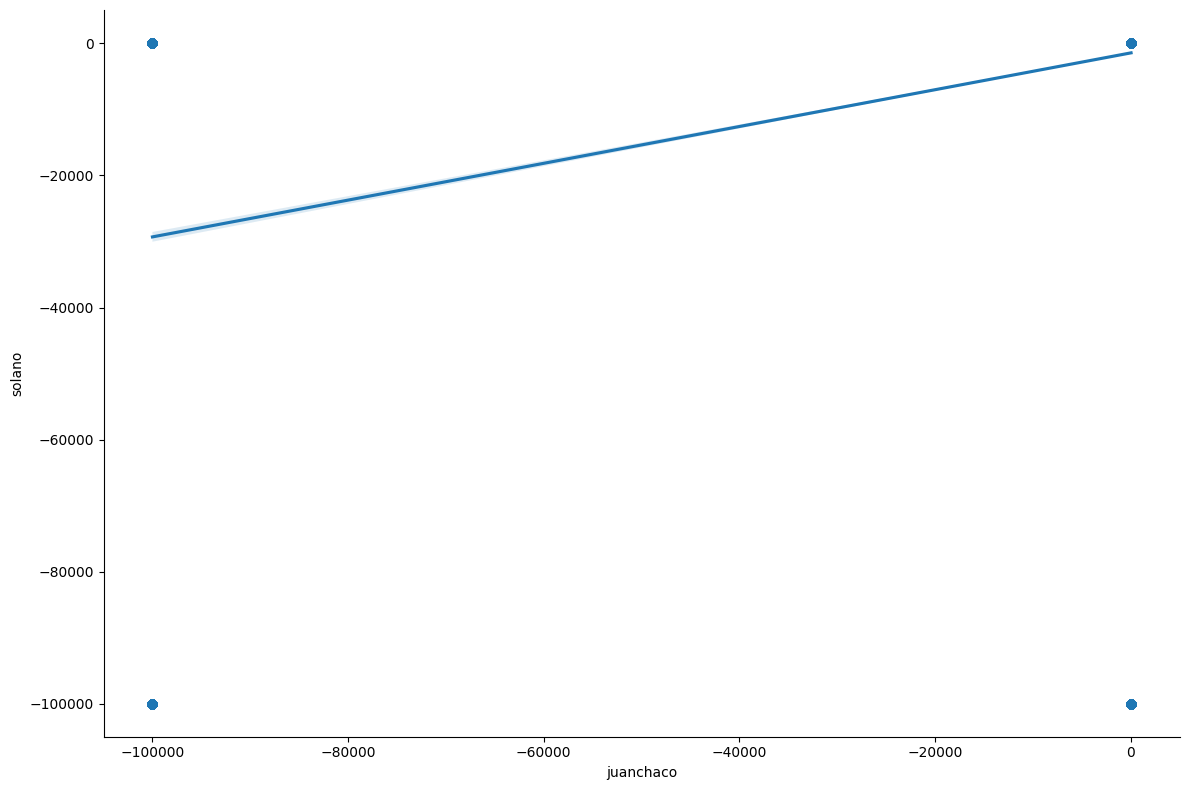

In [12]:
#Gráfico de dispersión 2 variables con centralidad
predictora = 'solano'
predictora2 = 'juanchaco'
predecir = 'malaga'
modelo = LinearRegression()# generamos la regresión lineal
modelo.fit(fechas_con_datos[[predictora]], fechas_con_datos[predecir])# entrenamos el modelo
print ('Ecuación de la recta: y = ', round(modelo.coef_[0],2),'x + ', round(modelo.intercept_,2))#obtenemos la ecuación de la recta
print ('Coeficiente de correlación: ', np.corrcoef(fechas_con_datos[predictora], fechas_con_datos[predecir])[0,1])#obtenemos el coeficiente de correlación
print ('Coeficiente de determinación: ', r2_score(fechas_con_datos[predecir], modelo.predict(fechas_con_datos[[predictora]])))#obtenemos el coeficiente de determinación
sns.lmplot(x='juanchaco', y='solano', data =fechas_con_datos, height=8, aspect=1.5) # Gráfico según variables
plt.show() #Mostrar 


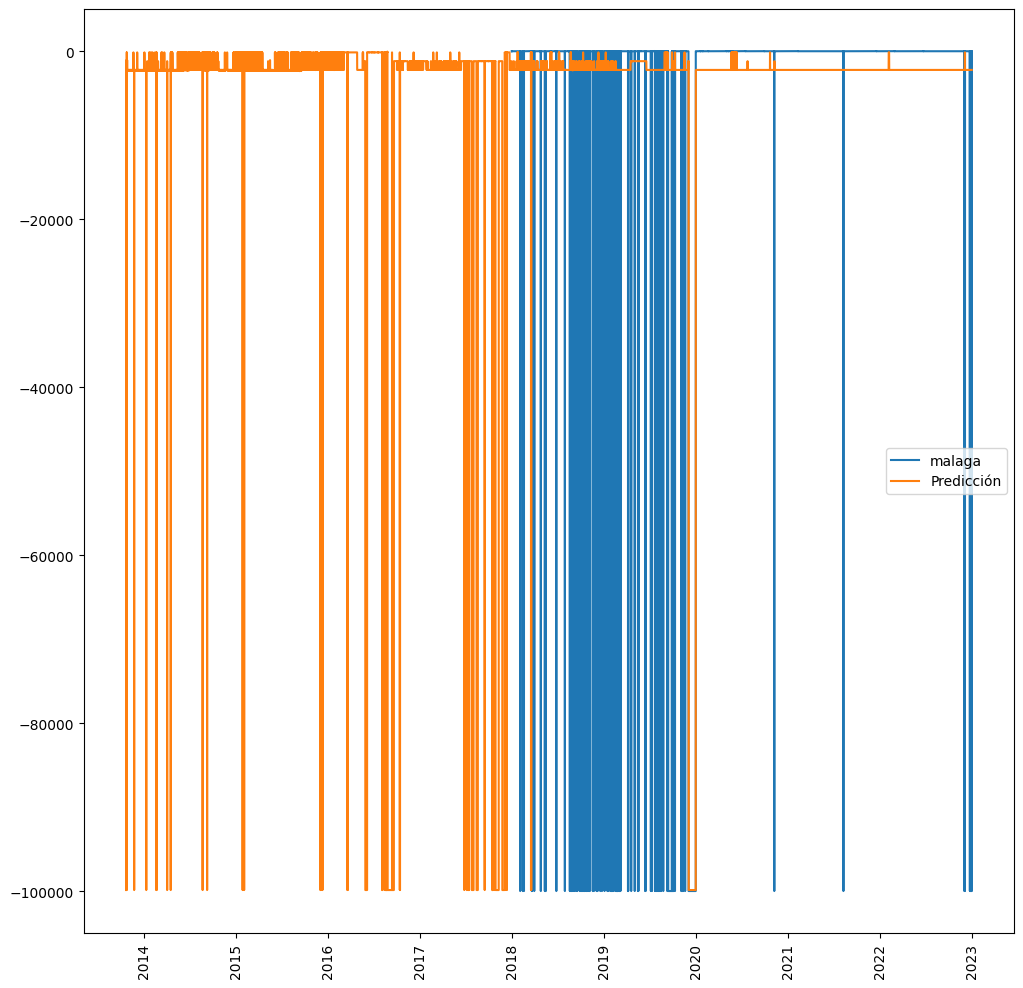

In [13]:
#Datos y/ variables
xTrain = fechas_con_datos[[predictora, predictora2]] # Variables predictora (dataframe)
yTrain = fechas_con_datos[[predecir]].values.flatten() # Variable a predicir (lista)
#Establecer un escalador para hacer homogeneos los datos en la predicción 
scaler = StandardScaler().fit(xTrain.values)
xTrainScaled = scaler.transform(xTrain.values)
# Generar el modelo de regresión de red neural
regr = MLPRegressor(random_state=1, max_iter=5000).fit(xTrainScaled, yTrain)
#test - realizamos prueba de predicción con los datos X
xTest = data_stations2[[predictora, predictora2]].dropna()
xTestScaled = scaler.transform(xTest.values)
# realizamos la predicción en los datos y
yPredict = regr.predict(xTestScaled)
#comparison of station 2
fig, ax=plt.subplots(figsize=(12,12),sharex=True,sharey=True)
ax.plot(data_stations2.index,data_stations2[predecir],label=predecir)#ajuste
ax.plot(xTest.index,yPredict,label='Predicción')
plt.legend()
plt.xticks(rotation='vertical')
plt.show()

In [14]:
# Se crea una nueva columna para agregar los datos
data_stations2[predecir + '_complet'] = 0 #ajustar
# Agregar los datos en la matriz (se agregan solamente predicciones donde no hay datos observados)
for index, row in data_stations2.iterrows():
    if np.isnan(row[predecir]) and ~np.isnan(row[predictora]) and ~np.isnan(row[predictora2]): #ajustar primer
        rowScaled = scaler.transform([[row[predictora],row[predictora]]])
        data_stations2.loc[index,[predecir + '_complet']] = regr.predict(rowScaled) #ajustar 
    elif ~np.isnan(row[predecir + '_complet']): #ajustar
        data_stations2.loc[index,[predecir + '_complet']] = row[predecir ] #ajustar 
    else:
        row[predecir + '_complet'] = np.nan #ajustar

C:\Users\dreng\AppData\Local\Temp\ipykernel_25372\518041843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_stations2[predecir + '_complet'] = 0 #ajustar


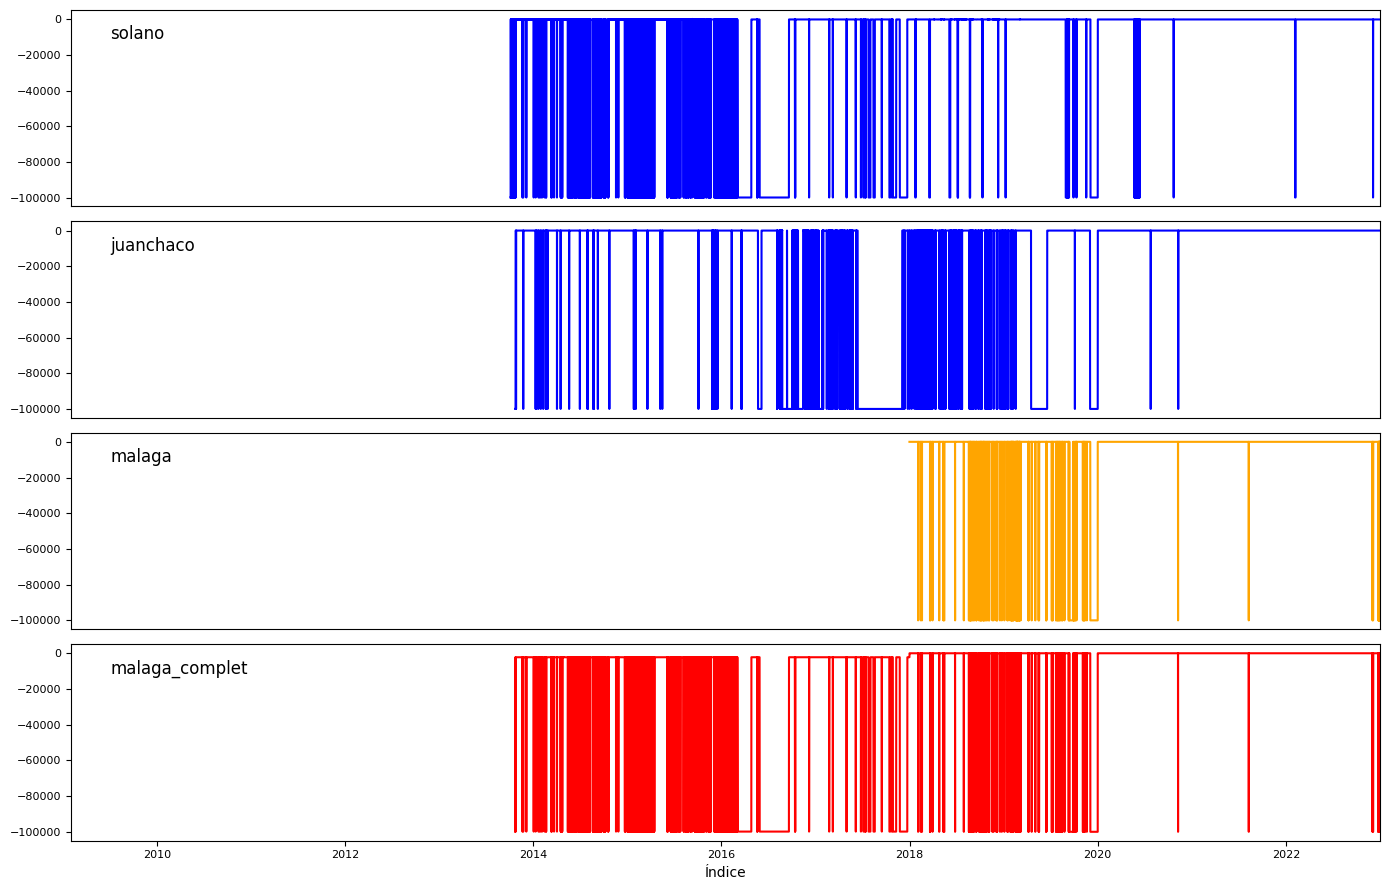

In [15]:
fig, axs = plt.subplots(nrows=len(data_stations2.columns), ncols=1, figsize=(14, 9))
colores = ['blue', 'blue', 'orange', 'red']  # Colores para las líneas

# Iterar sobre las columnas del DataFrame
for i, col in enumerate(data_stations2.columns):  # Enumerar las columnas del DataFrame
    ax = axs[i]  # Seleccionar el subgráfico correspondiente
    ax.plot(data_stations2.index, data_stations2[col], color=colores[i % len(colores)])  # Graficar la columna
    ax.set_ylabel('', fontsize=10)  # Etiqueta del eje Y (puedes personalizar)
    ax.tick_params(axis='both', which='major', labelsize=8)  # Ajustar el tamaño de las etiquetas
    ax.set_xlim(data_stations2.index.min(), data_stations2.index.max())  # Limitar el eje X a los valores disponibles
    ax.text(0.03, 0.85, col, transform=ax.transAxes, fontsize=12)  # Añadir el nombre de la columna en cada subgráfico

    # Ocultar etiquetas del eje X para los gráficos excepto el último
    if i != len(data_stations2.columns) - 1:
        ax.set_xticks([])
    else:
        ax.set_xlabel('Índice', fontsize=10)  # Etiqueta del eje X en el último gráfico

# Ajustar espacio entre gráficos
plt.subplots_adjust(hspace=0.1)
plt.tight_layout()
plt.show()
